60201359 이주영 6주차 실습

In [3]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

df=pd.read_csv("data/weather.csv")

print(df.shape)
df.head()

#결측치 확인
df.isnull().sum()

df = df.drop(['WindDir9am','WindDir3pm','WindGustSpeed','WindSpeed9am','WindSpeed3pm'], axis=1)
df["RainToday"]=df.RainToday.map({"No":0, "Yes":1})
df

#Sunshine결측치는 중간값으로, WindGustDir 결측치는 삭제함
df['Sunshine'].fillna(df['Sunshine'].median(), inplace=True)
df.dropna(subset=['WindGustDir'], inplace=True)

#결측치 확인
df.isnull().sum()

#강수량이 0초과 1이하 인데 강수여부 No인 데이터가 있어 찾아보니 본 데이터는 강수량이 1.0 이상이어야 yes로 처리한 것을 확인했다. 비가 조금이라도 오면 yes로 처리하기로 결정했고, 강수여부를 바꾸었다.
df.loc[df["Rainfall"] > 0, "RainToday"] = 1

#내일 강수 예측을 위한 RainTomorrow를 만든다
df["RainTomorrow"] = df["Rainfall"].shift(-1).apply(lambda x: 1 if x > 0 else 0)
df

#원핫인코딩
df= pd.get_dummies(df)
df

X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

X

y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

(366, 20)
X_train 크기: (254, 30)
y_train 크기: (254,)
X_test 크기: (109, 30)
y_test 크기: (109,)


In [4]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(max_depth=3, random_state=0) #max미지정
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [5]:
tree.fit(X_train, y_train)
print('스케일링 전 모델의 정확도 :', round(tree.score(X_test, y_test), 4))

스케일링 전 모델의 정확도 : 0.7982


In [13]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
mas.fit(X_train)
X_train_scaled = mas.transform(X_train)
X_test_scaled = mas.transform(X_test)
dtc=tree
dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.8073


In [14]:
X_train_scaled.shape

(254, 30)

In [15]:
from sklearn.ensemble import RandomForestClassifier

RF= RandomForestClassifier(n_estimators=100, random_state=0) #100그루
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [16]:
temp_y_pred_rf=RF.predict(X_test)
temp_y_pred_rf

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score

#정확도계산
temp_acc= accuracy_score(y_test, temp_y_pred_rf)

print(temp_acc)

0.7889908256880734


In [18]:
scores = []
for i in range(10,400,5):
    RF=RandomForestClassifier(n_estimators=i, random_state=0)
    RF.fit(X_train,y_train)
    
    att= RF.predict(X_test)
    acc = accuracy_score(y_test,att)
    scores.append(acc)
    
    print('>%d, acc: %.3f'% (i, acc))

>10, acc: 0.789
>15, acc: 0.789
>20, acc: 0.807
>25, acc: 0.761
>30, acc: 0.780
>35, acc: 0.807
>40, acc: 0.807
>45, acc: 0.798
>50, acc: 0.798
>55, acc: 0.817
>60, acc: 0.817
>65, acc: 0.798
>70, acc: 0.807
>75, acc: 0.798
>80, acc: 0.789
>85, acc: 0.761
>90, acc: 0.798
>95, acc: 0.780
>100, acc: 0.789
>105, acc: 0.771
>110, acc: 0.771
>115, acc: 0.780
>120, acc: 0.789
>125, acc: 0.789
>130, acc: 0.798
>135, acc: 0.780
>140, acc: 0.780
>145, acc: 0.780
>150, acc: 0.780
>155, acc: 0.780
>160, acc: 0.780
>165, acc: 0.789
>170, acc: 0.789
>175, acc: 0.789
>180, acc: 0.789
>185, acc: 0.789
>190, acc: 0.789
>195, acc: 0.798
>200, acc: 0.798
>205, acc: 0.798
>210, acc: 0.798
>215, acc: 0.789
>220, acc: 0.807
>225, acc: 0.798
>230, acc: 0.798
>235, acc: 0.789
>240, acc: 0.807
>245, acc: 0.807
>250, acc: 0.798
>255, acc: 0.798
>260, acc: 0.798
>265, acc: 0.807
>270, acc: 0.807
>275, acc: 0.807
>280, acc: 0.798
>285, acc: 0.798
>290, acc: 0.807
>295, acc: 0.807
>300, acc: 0.798
>305, acc: 0.79

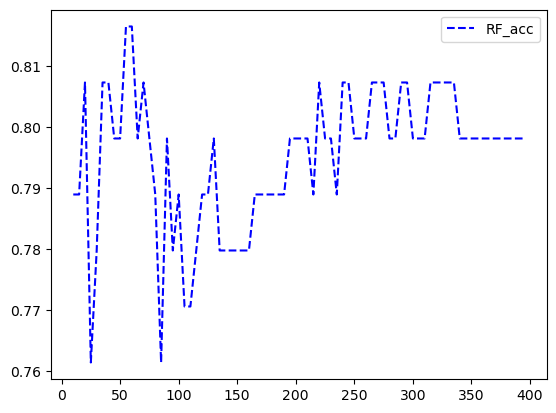

In [19]:
import matplotlib.pyplot as plt

plt.plot(range(10,400,5), scores, 'b--', label='RF_acc')
plt.legend()

In [20]:
#n_estmators =320으로 새로 적합
RF=RandomForestClassifier(n_estimators=320, random_state=0)
RF.fit(X_train, y_train)
temp_y_pred_rf = RF.predict(X_test)

In [21]:
#랜덤포레스트 모델성능
print('accuracy :', accuracy_score(y_test, temp_y_pred_rf))
print('precision :', precision_score(y_test, temp_y_pred_rf))
print('recall :', recall_score(y_test, temp_y_pred_rf))
print('f1 :', f1_score(y_test, temp_y_pred_rf))

accuracy : 0.8073394495412844
precision : 0.7142857142857143
recall : 0.5
f1 : 0.588235294117647


In [22]:
#ROC커브 AUC비교
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, RF.predict_proba(X_test)[:,1])

C:\Users\jylpi\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [23]:
roc_auc_DT= metrics.auc(fpr1,tpr1)
roc_auc_RF= metrics.auc(fpr2,tpr2)

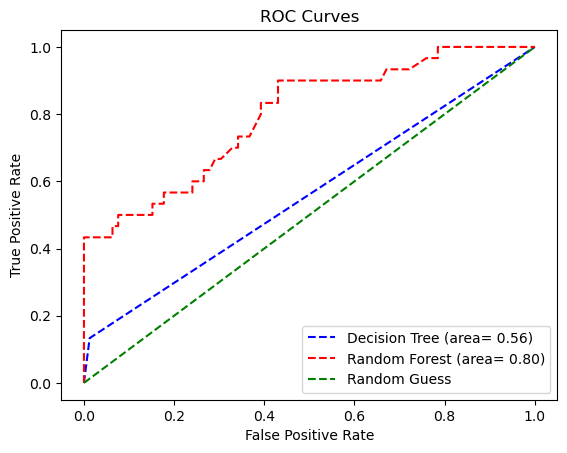

In [24]:
#연혁에 AUC값 출력
plt.plot(fpr1, tpr1, 'b--', label='Decision Tree (area= %0.2f)' %roc_auc_DT)
plt.plot(fpr2, tpr2, 'r--', label='Random Forest (area= %0.2f)' %roc_auc_RF)
plt.plot([0,1],[0,1],'g--',label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

In [25]:
#AUC 계산
from sklearn import metrics
roc_auc=metrics.auc(fpr2,tpr2)
print('Area Under Curve : %0.2f'% roc_auc)

Area Under Curve : 0.80
